In [15]:
import nengo
import tensorflow as tf
from tensorflow.keras import layers, activations
import numpy as np
import matplotlib.pyplot as plt
import nengo_dl
from urllib.request import urlretrieve


(x_train,_), (x_test, _) = tf.keras.datasets.mnist.load_data()

x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))

with nengo.Network(seed=0) as net:
    # default parameters
    # training progress will be more smoothly
    net.config[nengo.Ensemble].max_rates = nengo.dists.Choice([100])
    net.config[nengo.Ensemble].intercepts = nengo.dists.Choice([0])
    net.config[nengo.Connection].synapse = None
    neuron_type = nengo.LIF(amplitude=0.01)

    # training speed improve
    # True로 하면 optimize
    nengo_dl.configure_settings(stateful=False)

    # input node
    inp = nengo.Node(np.zeros(28 * 28))

    # layer
    x = nengo_dl.Layer(layers.Conv2D(32, kernel_size=3, padding="same"))(inp, shape_in=(28, 28, 1))
    x = nengo_dl.Layer(neuron_type)(x)
    x = nengo_dl.Layer(layers.MaxPooling2D((2, 2), padding="same"))(x, shape_in=(28, 28, 32))

    x = nengo_dl.Layer(layers.Conv2D(32, kernel_size=3, padding="same"))(x, shape_in=(14, 14, 32))
    x = nengo_dl.Layer(neuron_type)(x)
    x = nengo_dl.Layer(layers.MaxPooling2D((2, 2), padding="same"))(x, shape_in=(14, 14, 32))


    x = nengo_dl.Layer(layers.Conv2DTranspose(32, kernel_size=3, strides=2, padding="same"))(x, shape_in=(7, 7, 32))
    x = nengo_dl.Layer(neuron_type)(x)
    
    x = nengo_dl.Layer(layers.Conv2DTranspose(32, kernel_size=3, strides=2, padding="same"))(x, shape_in=(14, 14, 32))
    x = nengo_dl.Layer(neuron_type)(x)
    
    decoded = nengo_dl.Layer(layers.Conv2D(1, kernel_size=3, padding="same", activation="sigmoid"))(x, shape_in=(28, 28, 32))
    #decoded = nengo_dl.Layer(neuron_type)(decoded)

    # we'll create two different output probes, one with a filter
    # (for when we're simulating the network over time and
    # accumulating spikes), and one without (for when we're
    # training the network using a rate-based approximation)
    out_p = nengo.Probe(decoded, label="out_p")
    out_p_filt = nengo.Probe(decoded, synapse=0.1, label="out_p_filt")


batch_size = 128
sim = nengo_dl.Simulator(net, minibatch_size=batch_size)


# add single timestep to training data
train_images = x_train[:, None, :]

# when testing our network with spiking neurons we will need to run it
# over time, so we repeat the input/target data for a number of
# timesteps.
n_steps = 15
test_images = np.tile(x_test[:, None, :], (1, n_steps, 1))  # n_step만큼 같은 데이터를 복사해서 매 스텝 집어넣음


def classification_accuracy(y_true, y_pred):
    return tf.metrics.binary_crossentropy(y_true[:, -1], y_pred[:, -1])

# # note that we use `out_p_filt` when testing (to reduce the spike noise)
# sim.compile(loss={out_p_filt: classification_accuracy})
# print(
#     "Accuracy before training:",
#     sim.evaluate(test_images, {out_p_filt: test_images}, verbose=0)["loss"],
# )

do_training = True
if do_training:
    # run training
    sim.compile(
        optimizer=tf.optimizers.Adam(0.0001),
        loss={out_p: tf.losses.binary_crossentropy}
    )
    sim.fit(train_images, {out_p: train_images}, epochs=100)

    # save the parameters to file
    sim.save_params("snn_weight/mnist-vae")
    #sim.save_params("neuron_data/mnist_params_dense")
else:
    # download pretrained weights
    # urlretrieve(
    #     "https://drive.google.com/uc?export=download&"
    #     "id=1l5aivQljFoXzPP5JVccdFXbOYRv3BCJR",
    #     "mnist_params.npz",
    # )

    # load parameters
    # sim.load_params("./mnist_params_dense")
    sim.load_params("snn_weight/mnist-batchnorm")
#    sim.load_params("neuron_data/mnist_params_dense")

sim.compile(loss={out_p_filt: classification_accuracy})
print(
    "Accuracy after training:",
    sim.evaluate(test_images, {out_p_filt: test_images}, verbose=0)["loss"]
)

data = sim.predict(test_images[:batch_size])

# for i in range(10):
#     print("zzzz")
#     plt.figure(figsize=(8, 4))
#     plt.subplot(1, 2, 1)
#     plt.imshow(test_images[i, 0].reshape((28, 28)), cmap="gray")
#     plt.axis("off")

#     plt.subplot(1, 2, 2)
#     plt.plot(tf.nn.softmax(data[out_p_filt][i]))
#     plt.legend([str(i) for i in range(10)], loc="upper left")
#     plt.xlabel("timesteps")
#     plt.ylabel("probability")
#     plt.tight_layout()
#     plt.show()


Build finished in 0:00:00                                                      
Optimization finished in 0:00:00                                               
Construction finished in 0:00:00                                               
Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


C:\Users\USER\anaconda3\envs\data\lib\site-packages\nengo_dl\simulator.py:2107: RuntimeWarning: Simulator with model=Model: <Network (unlabeled) at 0x1ab445b77c8>, dt=0.001000 was deallocated while open. Simulators should be closed manually to ensure resources are properly freed.
  RuntimeWarning,


468/468 [==============================] - 18s 27ms/step - loss: -181.1658 - out_p_loss: -181.1658
Epoch 2/100
468/468 [==============================] - 12s 27ms/step - loss: -496.6614 - out_p_loss: -496.6614
Epoch 3/100
468/468 [==============================] - 13s 27ms/step - loss: -497.6505 - out_p_loss: -497.6505
Epoch 4/100
468/468 [==============================] - 13s 27ms/step - loss: -499.2738 - out_p_loss: -499.2738
Epoch 5/100
468/468 [==============================] - 13s 27ms/step - loss: -499.9046 - out_p_loss: -499.9046
Epoch 6/100
468/468 [==============================] - 12s 27ms/step - loss: -503.3662 - out_p_loss: -503.3662
Epoch 7/100
468/468 [==============================] - 12s 27ms/step - loss: -502.4026 - out_p_loss: -502.4026
Epoch 8/100
468/468 [==============================] - 12s 27ms/step - loss: -502.1121 - out_p_loss: -502.1121
Epoch 9/100
468/468 [==============================] - 13s 27ms/step - loss: -502.7956 - out_p_loss: -502.7956
Epoch 10/100


Epoch 74/100
468/468 [==============================] - 12s 27ms/step - loss: -503.7834 - out_p_loss: -503.7834
Epoch 75/100
468/468 [==============================] - 12s 27ms/step - loss: -504.3193 - out_p_loss: -504.3193
Epoch 76/100
468/468 [==============================] - 12s 26ms/step - loss: -504.7672 - out_p_loss: -504.7672
Epoch 77/100
468/468 [==============================] - 12s 27ms/step - loss: -505.3198 - out_p_loss: -505.3198
Epoch 78/100
468/468 [==============================] - 12s 27ms/step - loss: -505.7438 - out_p_loss: -505.7438
Epoch 79/100
468/468 [==============================] - 13s 27ms/step - loss: -504.3178 - out_p_loss: -504.3178
Epoch 80/100
468/468 [==============================] - 14s 29ms/step - loss: -506.1401 - out_p_loss: -506.1401
Epoch 81/100
468/468 [==============================] - 13s 27ms/step - loss: -505.6438 - out_p_loss: -505.6438
Epoch 82/100
468/468 [==============================] - 14s 30ms/step - loss: -505.7674 - out_p_loss: -5

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Accuracy after training: 77.15575408935547n 0:00:00                            
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


(-0.5, 27.5, 27.5, -0.5)

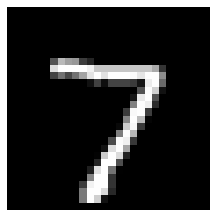

In [17]:
# label
index = 0

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(test_images[index, n_steps-1].reshape((28, 28)), cmap="gray")
plt.axis("off")

#plt.imshow(data[out_p][0][29].reshape(28, 28))

15


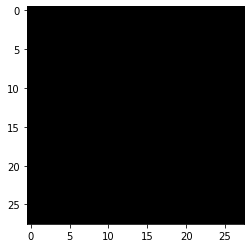

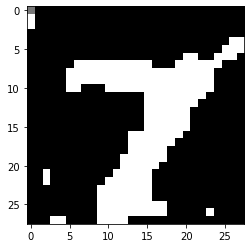

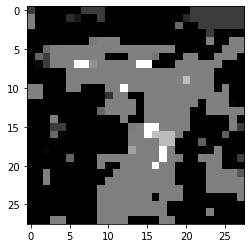

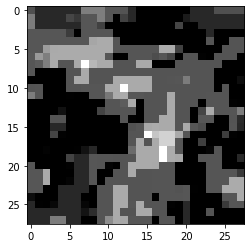

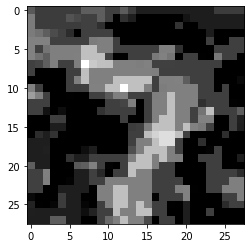

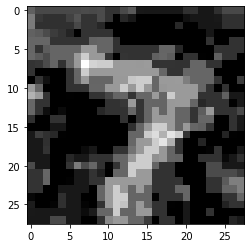

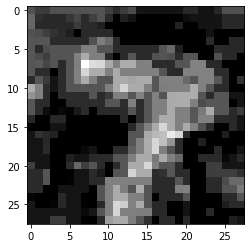

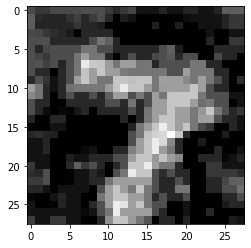

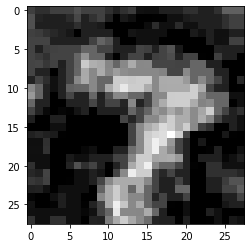

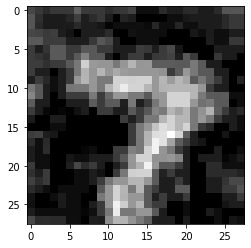

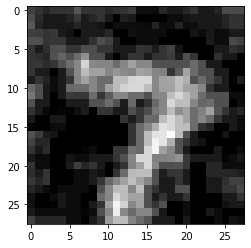

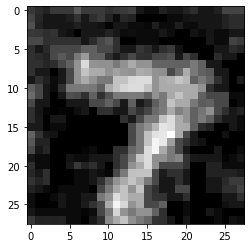

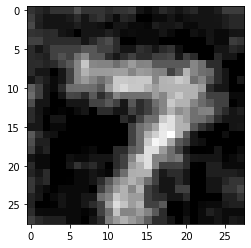

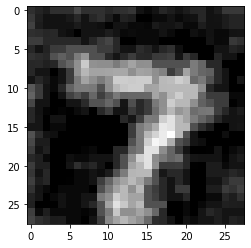

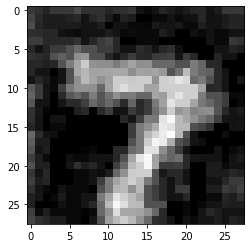

In [18]:
# pred

data[out_p][0][14].shape  # 배치중 0번째 이미지의 15번째 스텝 결과
print(len(data[out_p_filt][0]))
for i in range(len(data[out_p_filt][0])):
    plt.imshow(data[out_p_filt][index][i].reshape(28, 28))
    plt.gray()
    plt.show()